In [1]:
import gym 
import random 
import numpy as np
import tensorflow as tf


In [ ]:

env = gym.make('MountainCar-v0')

In [2]:
scores = [] 
accepted_score = [] 
required_score = -198 

training_data =[] 

for i in range(10000): 
    if i % 100 == 0:
        print(i) 

    score = 0 
    env.reset() 

    # 입출력 데이터 저장 (모든 게임) 
    game_memory = []
    # 이전 상태 저장
    previous_obs = [] 

    while True: 
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action) 

        # env.render()

        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])

        previous_obs = obs

        if obs[0] > -0.2:
            reward = 1

        score += reward
        # step += 1

        if done:
            break 

    scores.append(score)

    if score > required_score:
        accepted_score.append(score) 

        for data in game_memory:
            training_data.append(data) 

# env.env.close()

scores = np.array(scores)
print(f"score mean : {scores.mean()}")
print(f"accepted_score : {accepted_score}")



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
score mean : -199.936
accepted_score : [-188.0, -176.0, -188.0, -192.0, -192.0, -194.0, -192.0, -188.0, -182.0, -178.0, -196.0, -190.0, -174.0, -178.0, -180.0, -176.0, -188.0, -168.0, -172.0, -184.0, -172.0, -190.0, -176.0, -180.0, -190.0, -186.0, -190.0, -192.0, -190.0, -194.0, -160.0, -192.0, -186.0, -170.0, -182.0, -186.0, -168.0, -192.0, -190.0]


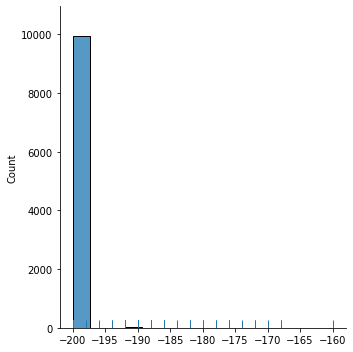

In [3]:
import seaborn as sns

sns.displot(scores, rug=True)

In [4]:
training_data[:5]

[[array([-4.000534e-01,  9.514413e-05], dtype=float32), 1],
 [array([-0.4008638 , -0.00081038], dtype=float32), 1],
 [array([-0.402574  , -0.00171023], dtype=float32), 1],
 [array([-0.4051721, -0.0025981], dtype=float32), 1],
 [array([-0.40863985, -0.00346774], dtype=float32), 1]]

In [5]:
train_x = np.array([i[0] for i in training_data])
print(f"Before shape : {train_x.shape}")
train_x = train_x.reshape(-1, 2)
print(f"After shape : {train_x.shape}")

train_y = np.array([i[1] for i in training_data])
print(f"Before shape : {train_y.shape}")
train_y = train_y.reshape(-1, 1)
print(f"After shape : {train_y.shape}")


Before shape : (7761, 2)
After shape : (7761, 2)
Before shape : (7761,)
After shape : (7761, 1)


In [6]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[2, ], activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(3, activation='relu'), 
])

model.compile(optimizer=tf.optimizers.Adam()
            , loss='sparse_categorical_crossentropy'
            , metrics=['accuracy'])




In [7]:
hist = model.fit(train_x, train_y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
364/364 [==============================] - 2s 3ms/step - loss: 1.1006 - accuracy: 0.3514 - val_loss: 1.0998 - val_accuracy: 0.3514
Epoch 2/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0971 - accuracy: 0.3512 - val_loss: 1.0947 - val_accuracy: 0.3766
Epoch 3/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0948 - accuracy: 0.3629 - val_loss: 1.0947 - val_accuracy: 0.3426
Epoch 4/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0939 - accuracy: 0.3698 - val_loss: 1.0871 - val_accuracy: 0.3926
Epoch 5/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0911 - accuracy: 0.3808 - val_loss: 1.0856 - val_accuracy: 0.3864
Epoch 6/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0894 - accuracy: 0.3871 - val_loss: 1.0841 - val_accuracy: 0.4029
Epoch 7/30
364/364 [==============================] - 1s 3ms/step - loss: 1.0883 - accuracy: 0.3902 - val_loss: 1.0881 - val_accuracy: 0.3694
Epoch 

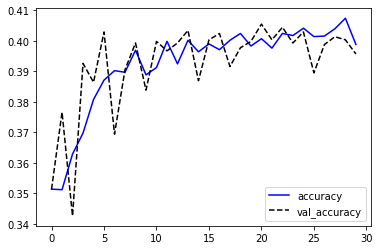

In [8]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['accuracy'], 'b-', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend() 
plt.show()

In [39]:

# env = wrap_env(gym.make('MountainCar-v0')) 
# env = gym.make('MountainCar-v0')
env.reset() 

score = 0 
step = 0 
previous_obs = [] 

while True: 

    # print(1)

    env.render()

    if len(previous_obs) == 0:
        action = env.action_space.sample() 
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        
    obs, reward, done, _ = env.step(action) 
    previous_obs = obs
    score += reward 
    step += 1

    if done:
        break 


print(f"score : {score}")
print(f"step : {step}")

env.env.close() 


score : -9.05007963605572
step : 999


In [10]:
env.env.close()

In [2]:
env = gym.make('MountainCarContinuous-v0')

In [3]:
print(env.observation_space)

print()

print(env.observation_space.low)
print(env.observation_space.high)

print()


print(f"action space : {env.action_space}") 

print(env._max_episode_steps)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

[-1.2  -0.07]
[0.6  0.07]

action space : Box([-1.], [1.], (1,), float32)
999


In [5]:

state_grid_count = 10 
action_grid_count = 6 

q_table = []

for i in range(state_grid_count):

    q_table.append([])

    for j in range(state_grid_count):
        q_table[i].append([])

        for a in range(action_grid_count):
            q_table[i][j].append(1e-4) 

actions = range(action_grid_count)
actions = np.array(actions).astype(float) 
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


In [6]:
import random 

# 관찰 상태를 각 격자에 보관
def obs_to_state(env, obs): 
    obs = obs.flatten() 
    # print(f"obs : {obs}")
    low = env.observation_space.low 
    # print(f"high : {high}")
    # print(f"low : {low}")
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    # print(f"idx : {idx}")
    idx = [int(x) for x in idx]
    # print(f"idx : {idx}")

    return idx 

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

In [7]:
sample = env.observation_space.sample() 
grid = obs_to_state(env, sample) 

print(sample) 
print(grid) 

[-0.78369075 -0.01849763]
[2, 3]


In [9]:
from tqdm import tqdm

max_episodes = 10000 

scores = [] 
steps = [] 
select_actions = [] 

learning_rate = 0.05 
gamma = 0.99
epsilon = 1.0 
epsilon_min = 0.01 

for i in tqdm(range(max_episodes)):
    epsilon *= 0.9 
    # 입실론 값보다 난수가 작을 때 랜덤한 값, 아니면 입실론 
    epsilon = max(epsilon_min, epsilon)

    # print(i) 

    if i % 100 == 0 and i != 0: 
        print(i, 'mean_score : {}, mean_step : {}, epsilon : {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))

    previous_obs = env.reset() 
    score = 0 
    step = 0 

    while True: 
        state_idx = obs_to_state(env, previous_obs) 

        if random.random() < epsilon:
            # print(1) 
            action_idx = random.randint(0, action_grid_count-1)
            # print(action_idx)
            action = actions[action_idx]

        else:
            # print(2)
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]

        # print("action : {}, type: {}".format(action, action.dtype))
        # action = 3.1
        # action = action.astype(float)
        # action = np.asscalar(action)
        # action = int(action)

        obs, reward, done, _ = env.step([action]) 
        previous_obs = obs
        score += reward 
        reward -= 0.05 
        step += 1

        select_actions.append(action) 
        new_state_idx = obs_to_state(env, obs) 

        q_table[state_idx[0]][state_idx[1]][action_idx] = learning_rate * \
            (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])

        if done:
            break 


    scores.append(score)
    steps.append(step) 

    if np.mean(scores[-100:]) >= 90:
        print('Solved on epsilon {}!'.format(i))
        break 

  1%|          | 103/10000 [00:06<10:50, 15.21it/s]

100 mean_score : -8.035039703152224, mean_step : 999.0, epsilon : 0.01


  2%|▏         | 203/10000 [00:12<10:37, 15.37it/s]

200 mean_score : -4.386719540362345, mean_step : 999.0, epsilon : 0.01


  3%|▎         | 304/10000 [00:18<10:15, 15.76it/s]

300 mean_score : -4.415839541575899, mean_step : 999.0, epsilon : 0.01


  4%|▍         | 403/10000 [00:24<10:03, 15.91it/s]

400 mean_score : -4.4353595428609776, mean_step : 999.0, epsilon : 0.01


  5%|▌         | 503/10000 [00:31<09:55, 15.96it/s]

500 mean_score : -4.40719954098462, mean_step : 999.0, epsilon : 0.01


  6%|▌         | 603/10000 [00:37<09:37, 16.27it/s]

600 mean_score : -4.42095954302787, mean_step : 999.0, epsilon : 0.01


  7%|▋         | 703/10000 [00:43<09:57, 15.55it/s]

700 mean_score : -4.446559543623918, mean_step : 999.0, epsilon : 0.01


  8%|▊         | 801/10000 [00:50<09:44, 15.74it/s]

800 mean_score : -4.402079541285027, mean_step : 999.0, epsilon : 0.01


  9%|▉         | 904/10000 [00:56<09:14, 16.42it/s]

900 mean_score : -4.385119539957035, mean_step : 999.0, epsilon : 0.01


 10%|█         | 1004/10000 [01:02<09:34, 15.67it/s]

1000 mean_score : -4.410079543657294, mean_step : 999.0, epsilon : 0.01


 11%|█         | 1104/10000 [01:09<09:39, 15.35it/s]

1100 mean_score : -4.403999541962136, mean_step : 999.0, epsilon : 0.01


 12%|█▏        | 1204/10000 [01:15<08:31, 17.18it/s]

1200 mean_score : -4.424159542479504, mean_step : 999.0, epsilon : 0.01


 13%|█▎        | 1305/10000 [01:21<08:52, 16.34it/s]

1300 mean_score : -4.467679542965885, mean_step : 999.0, epsilon : 0.01


 14%|█▍        | 1404/10000 [01:28<09:03, 15.80it/s]

1400 mean_score : -4.4231995430231015, mean_step : 999.0, epsilon : 0.01


 15%|█▌        | 1505/10000 [01:34<08:32, 16.59it/s]

1500 mean_score : -4.413599542295924, mean_step : 999.0, epsilon : 0.01


 16%|█▌        | 1603/10000 [01:40<08:44, 16.02it/s]

1600 mean_score : -4.4183995420575055, mean_step : 999.0, epsilon : 0.01


 17%|█▋        | 1705/10000 [01:47<08:56, 15.46it/s]

1700 mean_score : -4.411039542291157, mean_step : 999.0, epsilon : 0.01


 18%|█▊        | 1804/10000 [01:53<08:54, 15.33it/s]

1800 mean_score : -4.426719542376987, mean_step : 999.0, epsilon : 0.01


 19%|█▉        | 1906/10000 [01:59<08:20, 16.17it/s]

1900 mean_score : -4.434719543390266, mean_step : 999.0, epsilon : 0.01


 20%|██        | 2005/10000 [02:06<08:30, 15.65it/s]

2000 mean_score : -4.403039542040814, mean_step : 999.0, epsilon : 0.01


 21%|██        | 2103/10000 [02:12<08:36, 15.30it/s]

2100 mean_score : -4.417439541516295, mean_step : 999.0, epsilon : 0.01


 22%|██▏       | 2203/10000 [02:18<08:02, 16.17it/s]

2200 mean_score : -4.433439543066017, mean_step : 999.0, epsilon : 0.01


 23%|██▎       | 2301/10000 [02:24<08:30, 15.08it/s]

2300 mean_score : -4.391839541695107, mean_step : 999.0, epsilon : 0.01


 24%|██▍       | 2404/10000 [02:31<07:48, 16.21it/s]

2400 mean_score : -4.420959542360297, mean_step : 999.0, epsilon : 0.01


 25%|██▌       | 2506/10000 [02:37<07:52, 15.86it/s]

2500 mean_score : -4.443679543919556, mean_step : 999.0, epsilon : 0.01


 26%|██▌       | 2603/10000 [02:43<08:01, 15.36it/s]

2600 mean_score : -4.405919540982237, mean_step : 999.0, epsilon : 0.01


 27%|██▋       | 2704/10000 [02:49<07:44, 15.70it/s]

2700 mean_score : -4.437919542925352, mean_step : 999.0, epsilon : 0.01


 28%|██▊       | 2805/10000 [02:56<07:24, 16.20it/s]

2800 mean_score : -4.430239541993133, mean_step : 999.0, epsilon : 0.01


 29%|██▉       | 2905/10000 [03:02<07:38, 15.46it/s]

2900 mean_score : -4.39663954145669, mean_step : 999.0, epsilon : 0.01


 30%|███       | 3004/10000 [03:08<07:21, 15.85it/s]

3000 mean_score : -4.480159544875617, mean_step : 999.0, epsilon : 0.01


 31%|███       | 3104/10000 [03:14<07:27, 15.40it/s]

3100 mean_score : -4.422559541704647, mean_step : 999.0, epsilon : 0.01


 32%|███▏      | 3204/10000 [03:20<06:58, 16.24it/s]

3200 mean_score : -4.439199542796605, mean_step : 999.0, epsilon : 0.01


 33%|███▎      | 3302/10000 [03:27<06:46, 16.48it/s]

3300 mean_score : -4.419999542438975, mean_step : 999.0, epsilon : 0.01


 34%|███▍      | 3404/10000 [03:33<06:41, 16.42it/s]

3400 mean_score : -4.4215995425581855, mean_step : 999.0, epsilon : 0.01


 35%|███▌      | 3504/10000 [03:39<07:00, 15.46it/s]

3500 mean_score : -4.433119544129364, mean_step : 999.0, epsilon : 0.01


 36%|███▌      | 3606/10000 [03:46<06:53, 15.47it/s]

3600 mean_score : -4.390879541094293, mean_step : 999.0, epsilon : 0.01


 37%|███▋      | 3704/10000 [03:52<06:19, 16.57it/s]

3700 mean_score : -4.420639541099064, mean_step : 999.0, epsilon : 0.01


 38%|███▊      | 3805/10000 [03:58<06:47, 15.19it/s]

3800 mean_score : -4.451359543611997, mean_step : 999.0, epsilon : 0.01


 39%|███▉      | 3905/10000 [04:05<06:36, 15.36it/s]

3900 mean_score : -4.40847954078435, mean_step : 999.0, epsilon : 0.01


 40%|████      | 4006/10000 [04:11<06:23, 15.61it/s]

4000 mean_score : -4.430239541599742, mean_step : 999.0, epsilon : 0.01


 41%|████      | 4104/10000 [04:17<06:23, 15.36it/s]

4100 mean_score : -4.427039543745511, mean_step : 999.0, epsilon : 0.01


 42%|████▏     | 4202/10000 [04:24<06:14, 15.49it/s]

4200 mean_score : -4.40751954242467, mean_step : 999.0, epsilon : 0.01


 43%|████▎     | 4306/10000 [04:30<06:10, 15.35it/s]

4300 mean_score : -4.418719540982237, mean_step : 999.0, epsilon : 0.01


 44%|████▍     | 4402/10000 [04:36<05:58, 15.60it/s]

4400 mean_score : -4.4004795428347485, mean_step : 999.0, epsilon : 0.01


 45%|████▌     | 4503/10000 [04:42<05:38, 16.22it/s]

4500 mean_score : -4.4225595421934045, mean_step : 999.0, epsilon : 0.01


 46%|████▌     | 4603/10000 [04:49<05:18, 16.96it/s]

4600 mean_score : -4.422879542453281, mean_step : 999.0, epsilon : 0.01


 47%|████▋     | 4703/10000 [04:55<05:32, 15.95it/s]

4700 mean_score : -4.410719541125288, mean_step : 999.0, epsilon : 0.01


 48%|████▊     | 4804/10000 [05:01<04:57, 17.46it/s]

4800 mean_score : -4.428639542934888, mean_step : 999.0, epsilon : 0.01


 49%|████▉     | 4903/10000 [05:07<05:18, 16.02it/s]

4900 mean_score : -4.422879542047969, mean_step : 999.0, epsilon : 0.01


 50%|█████     | 5004/10000 [05:13<04:52, 17.05it/s]

5000 mean_score : -4.4100795405578515, mean_step : 999.0, epsilon : 0.01


 51%|█████     | 5104/10000 [05:19<04:52, 16.73it/s]

5100 mean_score : -4.410719542937268, mean_step : 999.0, epsilon : 0.01


 52%|█████▏    | 5206/10000 [05:25<04:40, 17.09it/s]

5200 mean_score : -4.397279541523445, mean_step : 999.0, epsilon : 0.01


 53%|█████▎    | 5305/10000 [05:31<04:41, 16.67it/s]

5300 mean_score : -4.434719542686934, mean_step : 999.0, epsilon : 0.01


 54%|█████▍    | 5404/10000 [05:37<04:53, 15.64it/s]

5400 mean_score : -4.437279544324868, mean_step : 999.0, epsilon : 0.01


 55%|█████▌    | 5501/10000 [05:43<04:37, 16.19it/s]

5500 mean_score : -4.423199542176715, mean_step : 999.0, epsilon : 0.01


 56%|█████▌    | 5606/10000 [05:50<04:41, 15.59it/s]

5600 mean_score : -4.387039539930808, mean_step : 999.0, epsilon : 0.01


 57%|█████▋    | 5703/10000 [05:56<04:21, 16.45it/s]

5700 mean_score : -4.438239542613022, mean_step : 999.0, epsilon : 0.01


 58%|█████▊    | 5804/10000 [06:02<04:27, 15.69it/s]

5800 mean_score : -4.4327995428204465, mean_step : 999.0, epsilon : 0.01


 59%|█████▉    | 5905/10000 [06:08<04:23, 15.56it/s]

5900 mean_score : -4.413919542078962, mean_step : 999.0, epsilon : 0.01


 60%|██████    | 6004/10000 [06:14<04:14, 15.72it/s]

6000 mean_score : -4.403679541070452, mean_step : 999.0, epsilon : 0.01


 61%|██████    | 6103/10000 [06:20<04:01, 16.14it/s]

6100 mean_score : -4.426079542322151, mean_step : 999.0, epsilon : 0.01


 62%|██████▏   | 6205/10000 [06:27<03:46, 16.73it/s]

6200 mean_score : -4.418079542119494, mean_step : 999.0, epsilon : 0.01


 63%|██████▎   | 6304/10000 [06:33<03:57, 15.58it/s]

6300 mean_score : -4.42351954331874, mean_step : 999.0, epsilon : 0.01


 64%|██████▍   | 6405/10000 [06:39<03:46, 15.84it/s]

6400 mean_score : -4.441119542579643, mean_step : 999.0, epsilon : 0.01


 65%|██████▌   | 6503/10000 [06:45<03:30, 16.61it/s]

6500 mean_score : -4.398879540808189, mean_step : 999.0, epsilon : 0.01


 66%|██████▌   | 6604/10000 [06:51<03:23, 16.65it/s]

6600 mean_score : -4.44303954297065, mean_step : 999.0, epsilon : 0.01


 67%|██████▋   | 6704/10000 [06:58<03:31, 15.59it/s]

6700 mean_score : -4.413279541594973, mean_step : 999.0, epsilon : 0.01


 68%|██████▊   | 6803/10000 [07:04<03:04, 17.28it/s]

6800 mean_score : -4.411999543261518, mean_step : 999.0, epsilon : 0.01


 69%|██████▉   | 6903/10000 [07:10<02:51, 18.09it/s]

6900 mean_score : -4.437279541761868, mean_step : 999.0, epsilon : 0.01


 70%|███████   | 7003/10000 [07:16<02:59, 16.71it/s]

7000 mean_score : -4.402079540724743, mean_step : 999.0, epsilon : 0.01


 71%|███████   | 7104/10000 [07:22<02:44, 17.58it/s]

7100 mean_score : -4.439199542737001, mean_step : 999.0, epsilon : 0.01


 72%|███████▏  | 7201/10000 [07:28<03:00, 15.47it/s]

7200 mean_score : -4.45199954246282, mean_step : 999.0, epsilon : 0.01


 73%|███████▎  | 7303/10000 [07:34<02:55, 15.41it/s]

7300 mean_score : -4.407519540874948, mean_step : 999.0, epsilon : 0.01


 74%|███████▍  | 7406/10000 [07:41<02:45, 15.68it/s]

7400 mean_score : -4.404959541645041, mean_step : 999.0, epsilon : 0.01


 75%|███████▌  | 7503/10000 [07:47<02:37, 15.90it/s]

7500 mean_score : -4.41391954087495, mean_step : 999.0, epsilon : 0.01


 76%|███████▌  | 7604/10000 [07:53<02:35, 15.46it/s]

7600 mean_score : -4.388639541146745, mean_step : 999.0, epsilon : 0.01


 77%|███████▋  | 7704/10000 [07:59<02:28, 15.48it/s]

7700 mean_score : -4.42095954084634, mean_step : 999.0, epsilon : 0.01


 78%|███████▊  | 7804/10000 [08:06<02:20, 15.63it/s]

7800 mean_score : -4.433759543123237, mean_step : 999.0, epsilon : 0.01


 79%|███████▉  | 7903/10000 [08:12<02:04, 16.81it/s]

7900 mean_score : -4.427999542224399, mean_step : 999.0, epsilon : 0.01


 80%|████████  | 8003/10000 [08:18<02:10, 15.31it/s]

8000 mean_score : -4.4449595437908105, mean_step : 999.0, epsilon : 0.01


 81%|████████  | 8103/10000 [08:24<01:54, 16.56it/s]

8100 mean_score : -4.424799541997902, mean_step : 999.0, epsilon : 0.01


 82%|████████▏ | 8206/10000 [08:31<01:56, 15.36it/s]

8200 mean_score : -4.4004795413207916, mean_step : 999.0, epsilon : 0.01


 83%|████████▎ | 8302/10000 [08:37<01:46, 15.91it/s]

8300 mean_score : -4.415199542689313, mean_step : 999.0, epsilon : 0.01


 84%|████████▍ | 8404/10000 [08:43<01:41, 15.65it/s]

8400 mean_score : -4.4081595413708605, mean_step : 999.0, epsilon : 0.01


 85%|████████▌ | 8506/10000 [08:50<01:37, 15.27it/s]

8500 mean_score : -4.449759543528551, mean_step : 999.0, epsilon : 0.01


 86%|████████▌ | 8604/10000 [08:56<01:29, 15.58it/s]

8600 mean_score : -4.439519542186253, mean_step : 999.0, epsilon : 0.01


 87%|████████▋ | 8704/10000 [09:02<01:20, 16.07it/s]

8700 mean_score : -4.3979195418643835, mean_step : 999.0, epsilon : 0.01


 88%|████████▊ | 8803/10000 [09:08<01:18, 15.29it/s]

8800 mean_score : -4.431199543213838, mean_step : 999.0, epsilon : 0.01


 89%|████████▉ | 8902/10000 [09:15<01:10, 15.51it/s]

8900 mean_score : -4.440159543409342, mean_step : 999.0, epsilon : 0.01


 90%|█████████ | 9002/10000 [09:21<01:00, 16.45it/s]

9000 mean_score : -4.415519543342581, mean_step : 999.0, epsilon : 0.01


 91%|█████████ | 9104/10000 [09:27<00:59, 15.14it/s]

9100 mean_score : -4.412639540884485, mean_step : 999.0, epsilon : 0.01


 92%|█████████▏| 9204/10000 [09:34<00:50, 15.73it/s]

9200 mean_score : -4.421599542081347, mean_step : 999.0, epsilon : 0.01


 93%|█████████▎| 9306/10000 [09:40<00:43, 15.93it/s]

9300 mean_score : -4.421919542841903, mean_step : 999.0, epsilon : 0.01


 94%|█████████▍| 9403/10000 [09:46<00:37, 16.13it/s]

9400 mean_score : -4.421919543223372, mean_step : 999.0, epsilon : 0.01


 95%|█████████▌| 9504/10000 [09:52<00:30, 16.15it/s]

9500 mean_score : -4.416799542582026, mean_step : 999.0, epsilon : 0.01


 96%|█████████▌| 9603/10000 [09:58<00:25, 15.79it/s]

9600 mean_score : -4.415519542031279, mean_step : 999.0, epsilon : 0.01


 97%|█████████▋| 9703/10000 [10:04<00:18, 15.77it/s]

9700 mean_score : -4.395679541428078, mean_step : 999.0, epsilon : 0.01


 98%|█████████▊| 9803/10000 [10:11<00:12, 15.61it/s]

9800 mean_score : -4.410079542465201, mean_step : 999.0, epsilon : 0.01


 99%|█████████▉| 9904/10000 [10:17<00:05, 16.94it/s]

9900 mean_score : -4.450399543654911, mean_step : 999.0, epsilon : 0.01


100%|██████████| 10000/10000 [10:23<00:00, 16.05it/s]
